# Case Study
## Objective:
- understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.
- When a person applies for a loan, there are two types of decisions that could be taken by the company:
  1. Loan Accepted
  2. Loan Rejected

In [3]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Importing data set into a pandas dataframe named 'loan_data'
loan_data=pd.read_csv("Lending Club Case Study/loan.csv")
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
#Checking the shape of the data set
loan_data.shape

(39717, 111)

## Data cleaning and Manipulation
- Removing all the columns with null values.
- Removing all the unnecessary columns and rows which is not required for analysing the Loan status of Borrowers.

In [6]:
# Removing the columns having only null values
loan_data.isna().sum()[loan_data.isna().sum()==39717]
loan_data.dropna(how='all',axis=1,inplace=True)

In [7]:
# Removing columns not relevant to our case study
loan_data.drop(columns=['id','funded_amnt_inv','emp_title','url','pymnt_plan','desc','title','issue_d','initial_list_status','out_prncp','last_credit_pull_d','zip_code','earliest_cr_line','last_pymnt_amnt','pub_rec','revol_bal','total_rec_late_fee','recoveries','out_prncp_inv','total_pymnt_inv','collection_recovery_fee','next_pymnt_d','last_pymnt_d','policy_code', 'application_type', 'acc_now_delinq', 'delinq_amnt','pub_rec_bankruptcies'],axis=1,inplace=True)

In [8]:
# Getting the columns which have null or 0 values
loan_data.isna().sum()[loan_data.isna().sum()>0]

emp_length                     1075
mths_since_last_delinq        25682
mths_since_last_record        36931
revol_util                       50
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
tax_liens                        39
dtype: int64

In [9]:
#dropping Tax Liens column as most of the loans are under 1 lakh and values are either null or 0.0
loan_data.drop('tax_liens',axis=1,inplace=True)

In [10]:
# Removing rows where employment length is null
loan_data=loan_data[~loan_data['emp_length'].isna()]

In [11]:
#Setting the null values in  'mths_since_last_delinq' column values to 0.0 since the possibility of these columns being null is that they are not being delinquent at all
loan_data['mths_since_last_delinq'].fillna(0.0,axis=0,inplace=True)

In [12]:
# Dropping mths_since_last_record column as this data is not relevant and has too many null records
loan_data.drop('mths_since_last_record',axis=1,inplace=True)

In [13]:
# Removing rows with null revolving line credit values
loan_data=loan_data[~loan_data['revol_util'].isna()]

In [14]:
#Removing chargeoff_within_12_mths and collections_12_mths_ex_med columns as it contain null or 0 vallues
loan_data.drop(columns=['chargeoff_within_12_mths','collections_12_mths_ex_med'], axis=1,inplace=True)

In [15]:
loan_data.isna().sum()[loan_data.isna().sum()>0]

Series([], dtype: int64)

In [16]:
# Removing all rows where loan is cuurently in progress and hence it's not relevant to our study
loan_data=loan_data[~(loan_data['loan_status']=='Current')]

In [17]:
# Correcting Data Type for Interest Rate columns by removing percentage from the last
loan_data.int_rate=loan_data.int_rate.apply(lambda x: float(x[:-1]))

In [18]:
# Correcting Data Type for Revolving Utilization Rate columns by removing percentage from the last
loan_data.revol_util=loan_data.revol_util.apply(lambda x: float(x[:-1]))

count    37497.000000
mean     10861.260234
std       7096.151309
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

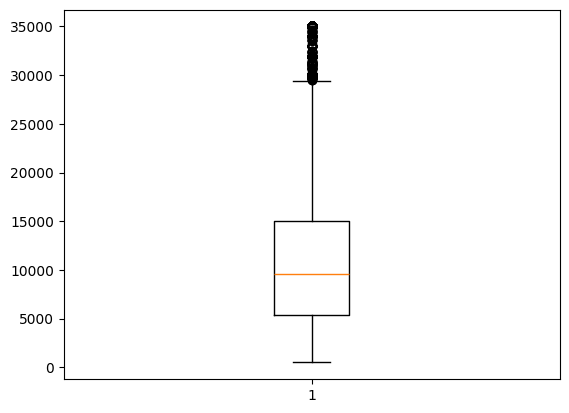

In [19]:
#Outlier treatment for funded Loan Amount column. 
plt.boxplot(loan_data.funded_amnt)
plt.show
loan_data.funded_amnt.describe()

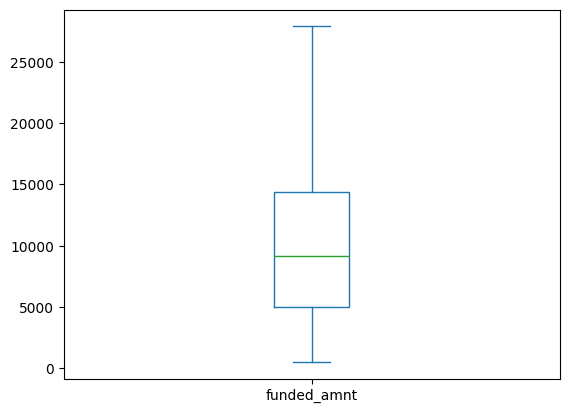

In [20]:
# Subseting the data to remove outliers for loan amount
loan_data[loan_data.funded_amnt<28000].funded_amnt.plot.box()
loan_data[loan_data.funded_amnt<28000].shape
loan_data_new=loan_data[loan_data.loan_amnt<28000]

count    36242.000000
mean     10168.406821
std       6089.410209
min        500.000000
25%       5000.000000
50%       9000.000000
75%      14000.000000
max      27600.000000
Name: funded_amnt, dtype: float64

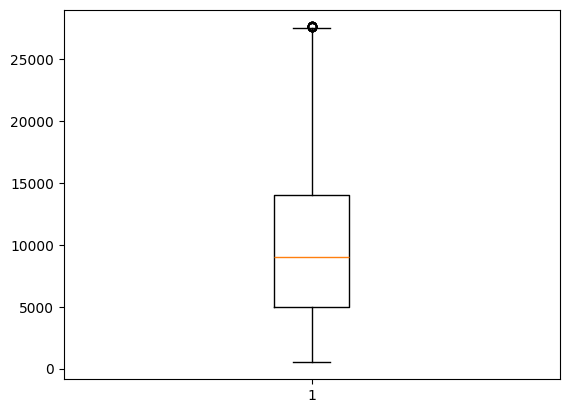

In [21]:
# Outlier treatment for annual income column. 
plt.boxplot(loan_data_new.funded_amnt)
plt.show
loan_data_new.funded_amnt.describe()

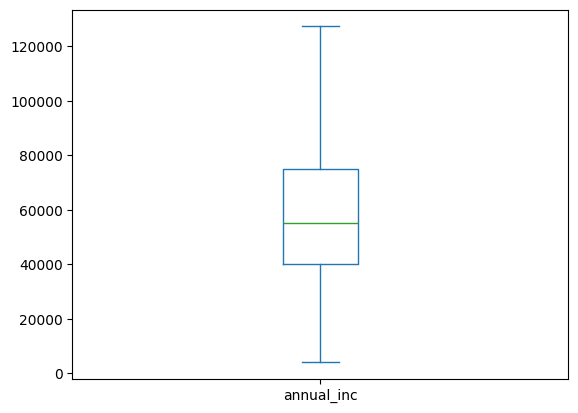

In [22]:
# Subsetting the data to remove outliers for annual income
loan_data_new[loan_data_new.annual_inc<127500].annual_inc.plot.box()
loan_data_new=loan_data_new[loan_data_new.annual_inc<127500]

count    33968.000000
mean        21.360987
std         11.129224
min          2.000000
25%         13.000000
50%         20.000000
75%         28.000000
max         90.000000
Name: total_acc, dtype: float64

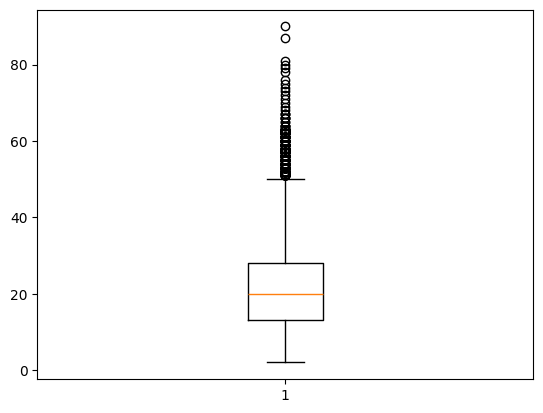

In [23]:
# Outlier treatment for total opened credit lines column.
plt.boxplot(loan_data_new.total_acc)
plt.show
loan_data_new.total_acc.describe()

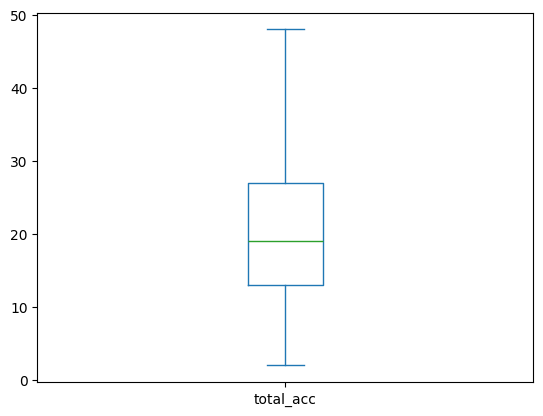

In [24]:
# Subsetting the data to remove outliers for total number of open credit lines on a customer
loan_data_new[loan_data_new['total_acc']<49].total_acc.plot.box()
loan_data_new=loan_data_new[loan_data_new.total_acc<49]

## Univariate and Bivariate Analysis

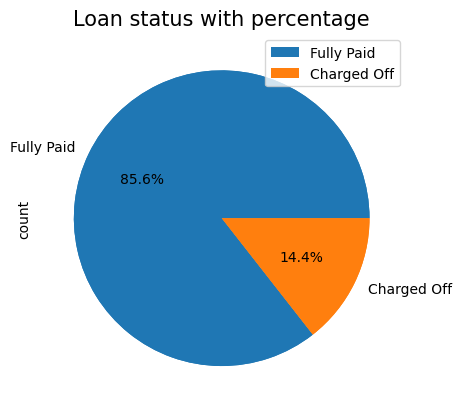

In [25]:
y = loan_data_new['loan_status'].value_counts()
loan_data_new['loan_status'].value_counts().plot.pie()
plt.title("Loan status with percentage", size = 15)
plt.pie(y, autopct='%1.1f%%')
plt.legend()
plt.show() 

**Observation:**
- The given pie chart shows that the 85.6% Borrowers are likely to be regular whose loan can be accepted and called as non-risky loan.
- The remaining 14.4% Borrowers are likely to be defaulter and whose loan can be rejected and called as risky loan

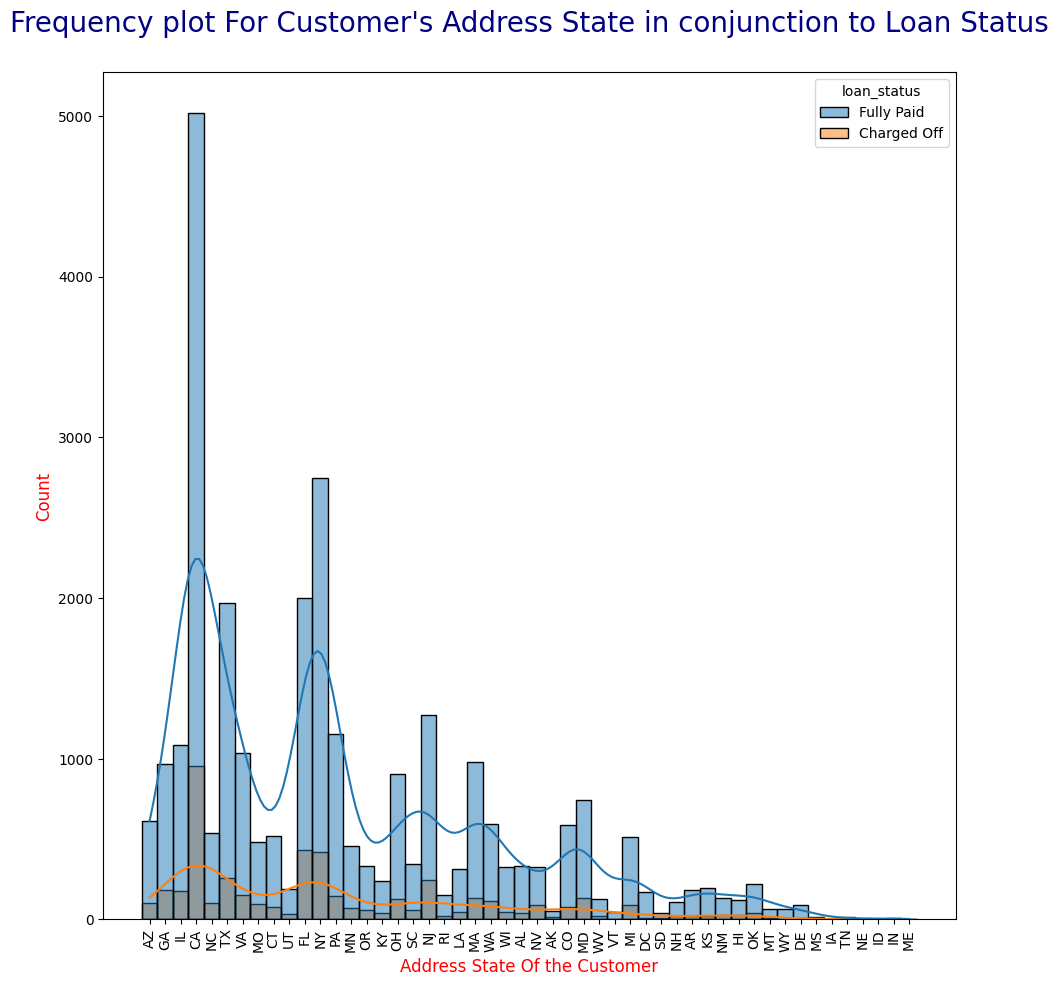

In [26]:
plt.figure(figsize=(11,11))
sns.histplot(x=loan_data_new.addr_state,kde=True,hue=loan_data_new['loan_status'],color='pink')
plt.title("Frequency plot For Customer's Address State in conjunction to Loan Status\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'navy'})
plt.xticks(rotation=90)
plt.xlabel("Address State Of the Customer", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'red'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'red'})
plt.show()

**Observation:**
- California, Texas, Florida, New York and New Jersey having more frequency of loan applicants and they are likely to be regular as compared to other state borrowers.

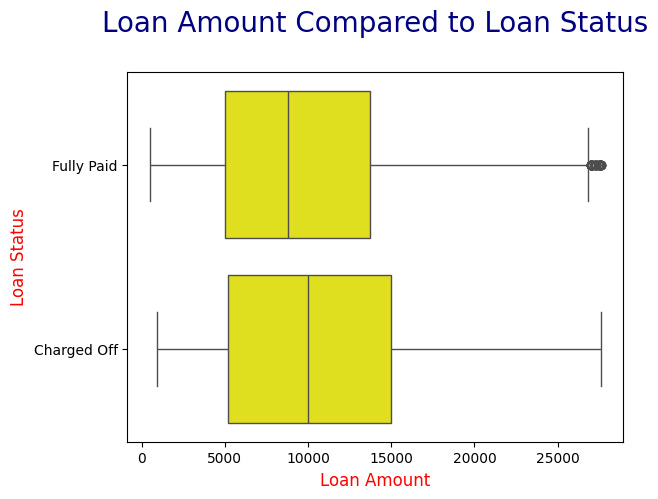

In [27]:
# Comparing Loan Status with Loan Amount
sns.boxplot(x=loan_data_new['loan_amnt'],y=loan_data_new['loan_status'],color='yellow')
# Adding and formatting title
plt.title("Loan Amount Compared to Loan Status\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'navy'})

# Labeling Axes
plt.xlabel("Loan Amount", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'red'})
plt.ylabel("Loan Status", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'red'})
plt.show()

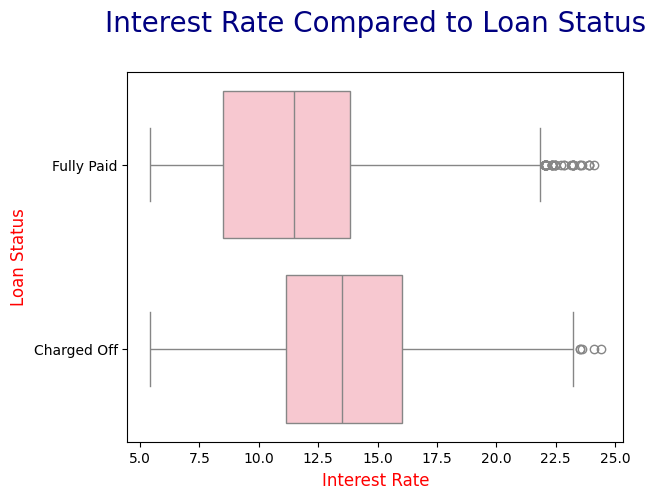

In [28]:
# Comparing Loan Status with Interest Rates offered
sns.boxplot(x=loan_data_new['int_rate'],y=loan_data_new['loan_status'],color='pink')
plt.title("Interest Rate Compared to Loan Status\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'navy'})

# Labeling Axes
plt.xlabel("Interest Rate", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'red'})
plt.ylabel("Loan Status", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'red'})
plt.show()

**Observation:** 
- Borrowers whose interest rate is less are likely to be regular one.

In [29]:
#Borrower data separated as charged off and paid one
charged_off_loan=loan_data_new[loan_data_new['loan_status']=='Charged Off']
paid_loan_data=loan_data_new[loan_data_new['loan_status']=='Fully Paid']

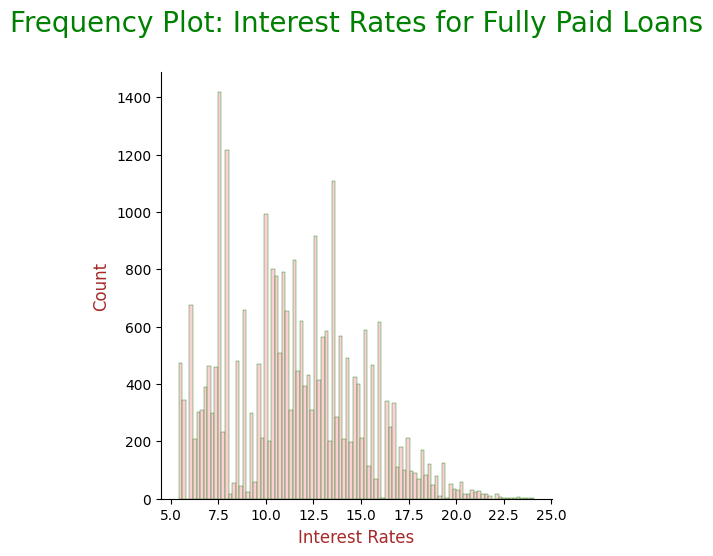

In [30]:

sns.displot(data=paid_loan_data,x='int_rate',color='pink',edgecolor='green',bins=100)

# Adding and formatting title
plt.title("Frequency Plot: Interest Rates for Fully Paid Loans\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Interest Rates", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

plt.show()

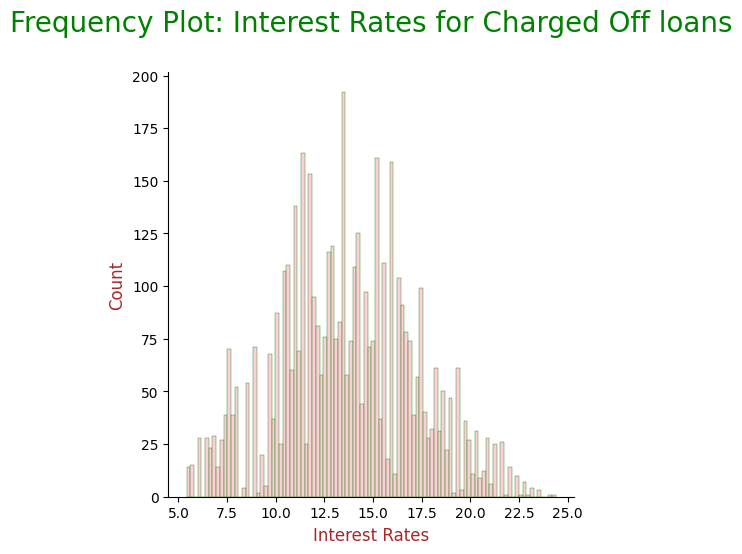

In [31]:
sns.displot(data=charged_off_loan,x='int_rate',color='pink',edgecolor='green',bins=100)

# Adding and formatting title
plt.title("Frequency Plot: Interest Rates for Charged Off loans\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Interest Rates", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

plt.show()

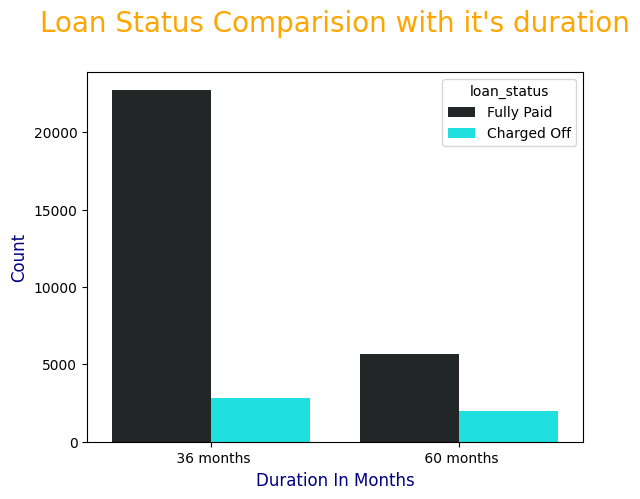

In [32]:
sns.countplot(data=loan_data_new,x='term',hue=loan_data_new['loan_status'],color='cyan')
# Adding and formatting title
plt.title("Loan Status Comparision with it's duration\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'orange'})

# Labeling Axes
plt.xlabel("Duration In Months", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'navy'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'navy'})

plt.show()


**Observation**
- From the above Bar plot it is observed that the Borowers whose number of payments on the loan are less, those are likely to regular.

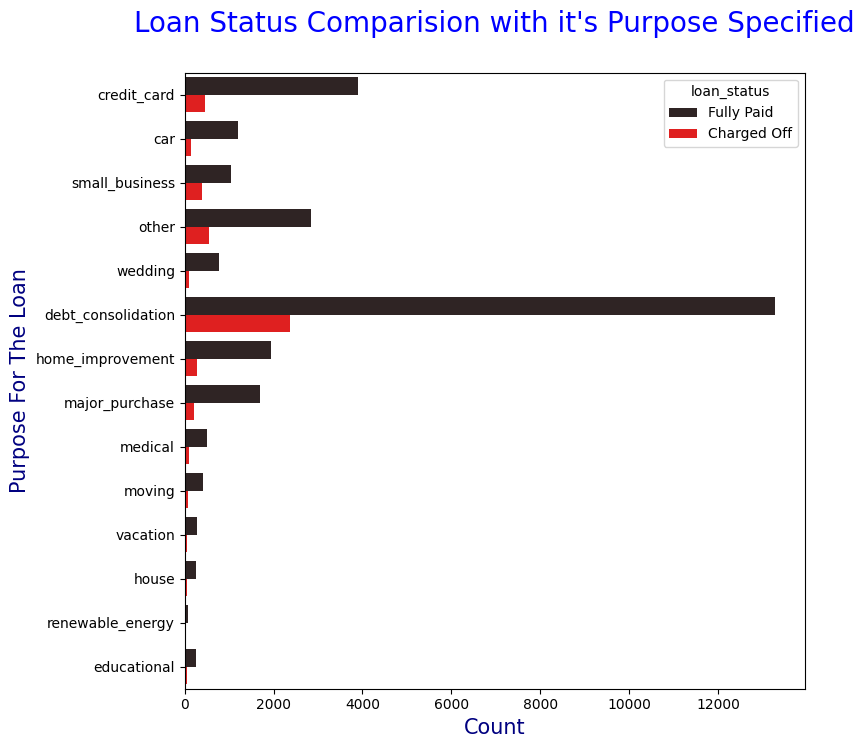

In [33]:
plt.figure(figsize=(8,8))
sns.countplot(data=loan_data_new,y='purpose',hue=loan_data_new['loan_status'],color='red')
# Adding and formatting title
plt.title("Loan Status Comparision with it's Purpose Specified\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'blue'})

# Labeling Axes
plt.xlabel("Count", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'navy'})
plt.ylabel("Purpose For The Loan", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'navy'})

plt.show()

**Observation**
- It is observed that the Borrower who apply for loan for debt consolidation and credit card purpose are regular in greater no. as compared to borrower who apply for loan for other purpose.

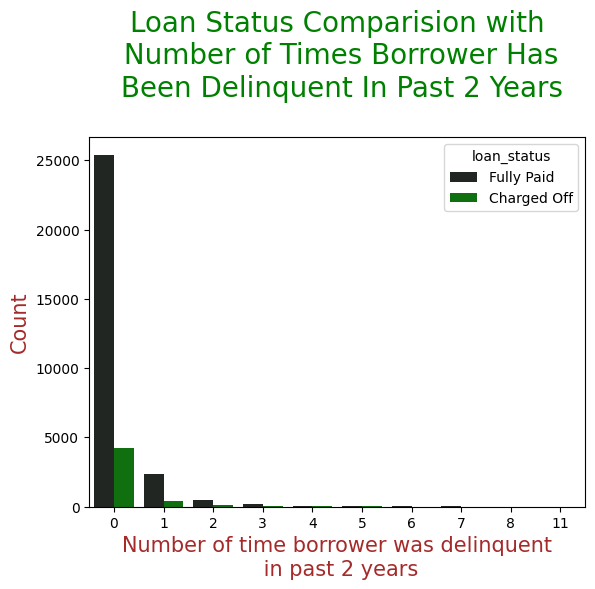

In [34]:

sns.countplot(data=loan_data_new,x='delinq_2yrs',hue=loan_data_new['loan_status'],color='green')
# Adding and formatting title
plt.title("Loan Status Comparision with\n Number of Times Borrower Has\n Been Delinquent In Past 2 Years\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

# Labeling Axes
plt.ylabel("Count", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Brown'})
plt.xlabel("Number of time borrower was delinquent\n in past 2 years", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Brown'})

plt.show()

- The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years are more, they are likely to be defaulter. Here it is obesrved that there are less number of borrowers are likely to be defaulter than regular one.

## Multivariate Analysis

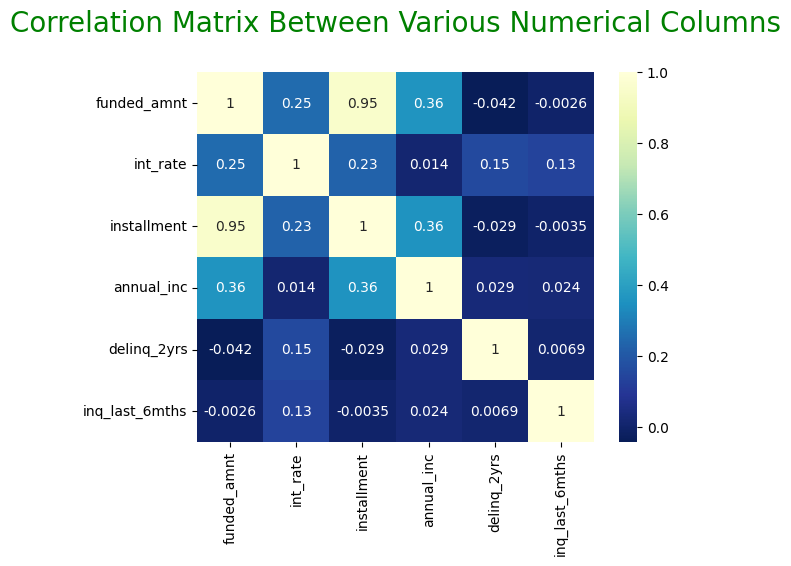

In [35]:
# Creating Correlation Between Various Loan Attributes
new_corr=loan_data_new[['funded_amnt','int_rate','installment','annual_inc','delinq_2yrs','inq_last_6mths']]
sns.heatmap(data=new_corr.corr(),annot=True,cmap="YlGnBu_r")
plt.title("Correlation Matrix Between Various Numerical Columns\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

- In the above Correlation matrix 6 columns are correlated with each other and it is observed that:
  1. **Funded amount** is in positive corralation with interest rate, installment and annual income and viceversa. If funded amount more then interest rate, installment and annual income will be more and viceversa.
  2. Funded amount is in negative correlation with delinquency in 2 years and number of inquiries.
  3. **Interest rate** is in positive correlation with installment, annual income, delinquency in 2 years and inquiry in last 6 months and viceversa. Thus if any one of the parameter increases then other will increase in the ratio given above.
  4. **Installments** of each borrower are in positive correlation with annual income. If annual income of Borrower is more then he/she will apply for more interest. 
  5. The **interest rate** is in negative correlation with delinquency in 2 years and number of inquiries in last 6 months.
  6. **Annual income** of borrower is in positive correlation with interest rate, installment, annual income and funded amount as shown in above heatmap
  7. The number of **delinquncy in 2 years and number of inquiries** are in positive correlation with each other. If there are more number of inquiries for funded amount in last 6 months, then such loan will be risky loan.

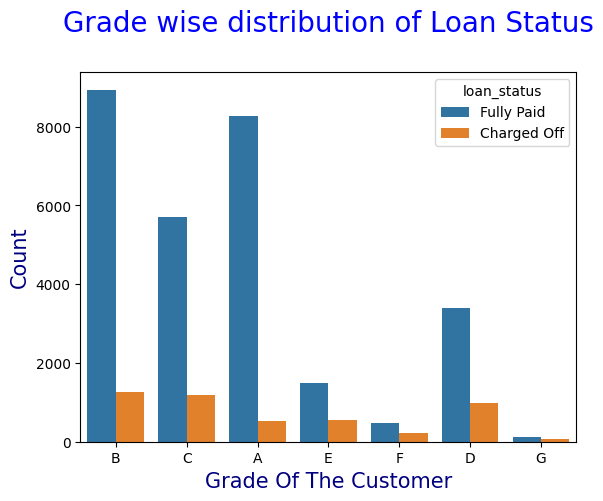

In [36]:
sns.countplot(data=loan_data_new,x='grade',hue='loan_status')
plt.title("Grade wise distribution of Loan Status\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'blue'})

# Labeling Axes
plt.xlabel("Grade Of The Customer", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'navy'})
plt.ylabel("Count", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'navy'})
plt.show()

**Observation:**
- LC assign a Grade to Borrowers based on a borrower's credit history, and the likelihood of repayment of the principal and interest. Thus it is observed that the more number of Borrowers are having good grades, so there are more number of Borrowers are regular one as compared to defaulter one.

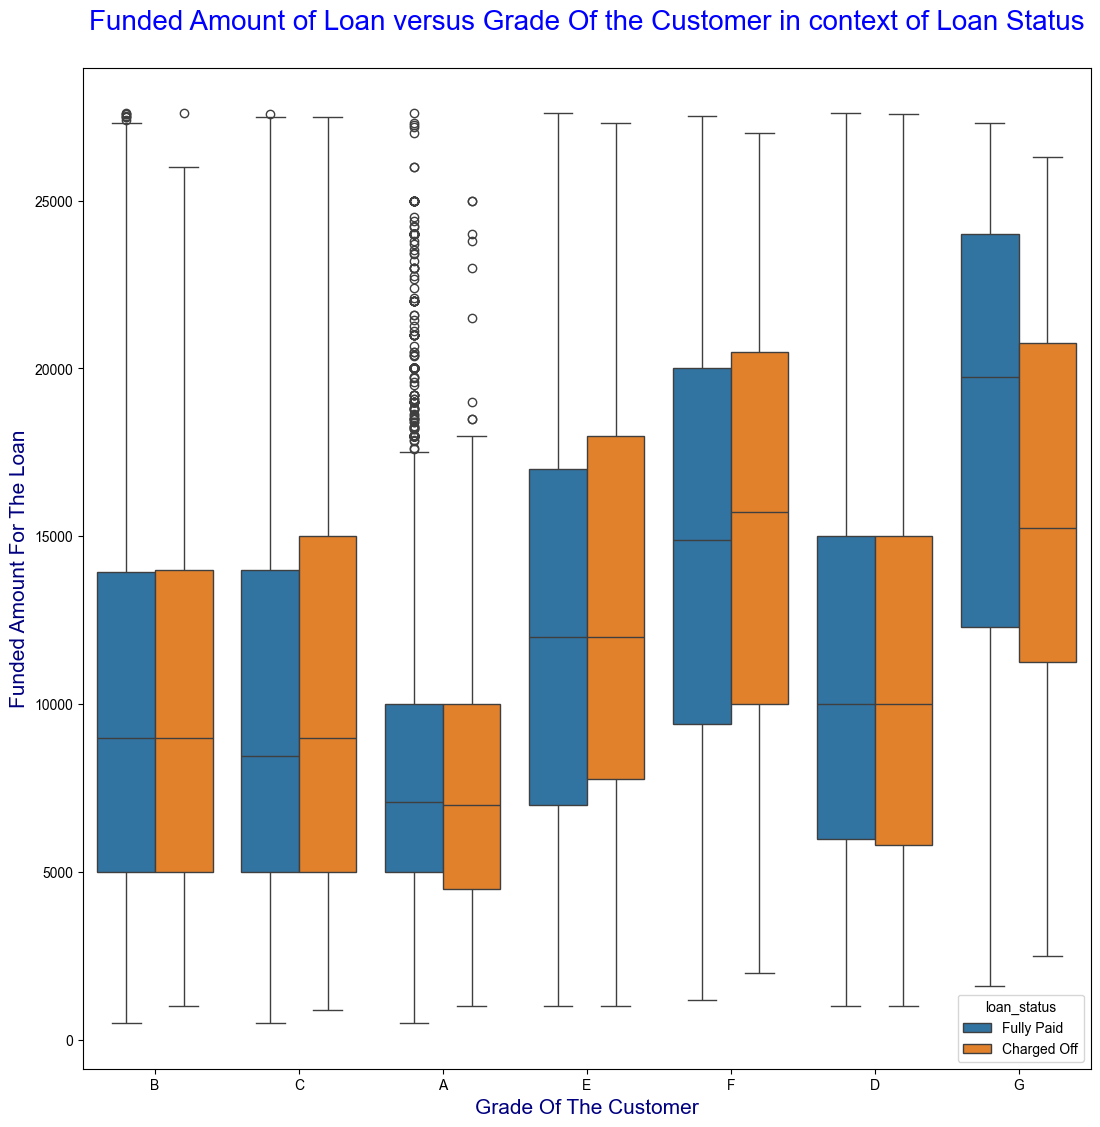

In [37]:
plt.figure(figsize=(13,13))
sns.boxplot(data=loan_data_new,x='grade',y='funded_amnt',hue='loan_status')
sns.set_style('dark')
plt.title("Funded Amount of Loan versus Grade Of the Customer in context of Loan Status\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'blue'})

# Labeling Axes
plt.xlabel("Grade Of The Customer", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'navy'})
plt.ylabel("Funded Amount For The Loan", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'navy'})
plt.show()

**Observation:**
- Borrowers having LC Grade as A, B and C applied for less loan amount and they are likely to be regular whereas Borrowers having grade E, F and G applied for large loan amount and as they paid for the same, so they can be considered as regular.